Accuracy:  0.809598
lin_x:  [[ 1.         -1.70910872]
 [ 1.         -1.6629166 ]
 [ 1.         -1.61672447]
 [ 1.         -1.57053234]
 [ 1.         -1.52434021]
 [ 1.         -1.47814809]
 [ 1.         -1.43195596]
 [ 1.         -1.38576383]
 [ 1.         -1.3395717 ]
 [ 1.         -1.29337958]
 [ 1.         -1.24718745]
 [ 1.         -1.20099532]
 [ 1.         -1.15480319]
 [ 1.         -1.10861106]
 [ 1.         -1.06241894]
 [ 1.         -1.01622681]
 [ 1.         -0.97003468]
 [ 1.         -0.92384255]
 [ 1.         -0.87765043]
 [ 1.         -0.8314583 ]
 [ 1.         -0.78526617]
 [ 1.         -0.73907404]
 [ 1.         -0.69288192]
 [ 1.         -0.64668979]
 [ 1.         -0.60049766]
 [ 1.         -0.55430553]
 [ 1.         -0.5081134 ]
 [ 1.         -0.46192128]
 [ 1.         -0.41572915]
 [ 1.         -0.36953702]
 [ 1.         -0.32334489]
 [ 1.         -0.27715277]
 [ 1.         -0.23096064]
 [ 1.         -0.18476851]
 [ 1.         -0.13857638]
 [ 1.         -0.09238426]


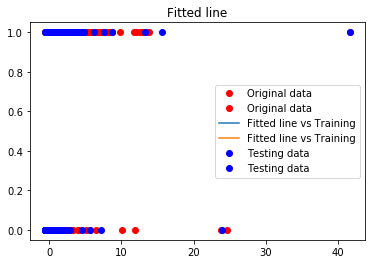

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
%matplotlib inline

def getData(filePath):
    data = np.genfromtxt(filePath, delimiter=',')
    x, y = np.array(data[:,0:-1], dtype=float), np.array(data[:,-1],dtype=int)
    return x,y

def normalize_duration(x):
    mu = np.mean(x,axis=0)
    sigma = np.std(x,axis=0)
    return (x - mu)/sigma

def append_bias(x):
    n_training_samples, n_dim  = x.shape[0], x.shape[1]
    return np.reshape(np.c_[np.ones(n_training_samples),x],[n_training_samples,n_dim + 1])

def one_hot_encode(y):
    n = len(y)
    n_unique = len(np.unique(y))
    one_hot_encode = np.zeros((n,n_unique))
    one_hot_encode[np.arange(n), y] = 1
    return one_hot_encode

all_x,all_y = getData('data/all-flippedRegistrationStatus.csv')
all_x = normalize_duration(all_x)
all_x = append_bias(all_x)
all_y = one_hot_encode(all_y)


n_dim = all_x.shape[1]
rnd_indices = np.random.rand(len(all_x)) < 0.80

train_x = all_x[rnd_indices]
train_y = all_y[rnd_indices]
test_x = all_x[~rnd_indices]
test_y = all_y[~rnd_indices]

learning_rate = 0.1
training_epochs = 100

X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,2])
W = tf.Variable(tf.ones([n_dim,2]),name='Weight')

init = tf.global_variables_initializer()

y_ = tf.nn.sigmoid(tf.matmul(X,W))
cost_function = tf.reduce_mean(tf.reduce_sum((-Y * tf.log(y_)) - ((1 - Y) * tf.log(1 - y_)), 
reduction_indices=[1]))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

cost_history = np.empty(shape=[1],dtype=float)
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        sess.run(optimizer,feed_dict={X:train_x,Y:train_y})
        cost_history = np.append(cost_history,sess.run(cost_function,
        	feed_dict={X: train_x,Y: train_y}))
    
    y_pred = sess.run(y_ , feed_dict={X: test_x})
    correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy: ",(sess.run(accuracy, feed_dict={X: test_x, Y: test_y})))
    
    # Graphic display
    plt.plot(train_x, train_y, 'ro', label='Original data')
    lin_x = append_bias(normalize_duration(np.matrix(np.arange(0,15,0.2)).transpose()))
    lin_y = sess.run(y_,feed_dict={X: lin_x})
    plt.plot(lin_x, lin_y, label='Fitted line vs Training')

    plt.plot(test_x, test_y, 'bo', label='Testing data')
    plt.legend()
    plt.title("Fitted line")

    print("lin_x: ",lin_x)
    print("lin_y: ",lin_y)